In [ ]:
from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/NLMCXR/images'
import os
files = os.listdir(folder_path)
print(files)

Mounted at /content/drive
['CXR3172_IM-1494-1002.png', 'CXR3913_IM-1989-84584002.png', 'CXR3319_IM-1588-2001.png', 'CXR3025_IM-1400-1001.png', 'CXR1796_IM-0517-1003.png', 'CXR246_IM-0992-1003002.png', 'CXR504_IM-2122-2001.png', 'CXR1751_IM-0494-1001.png', 'CXR97_IM-2460-3003.png', 'CXR299_IM-1377-2001.png', 'CXR2073_IM-0707-1001.png', 'CXR3686_IM-1837-0001-0001.png', 'CXR2813_IM-1239-2001.png', 'CXR1022_IM-0017-1001.png', 'CXR3824_IM-1931-1001.png', 'CXR909_IM-2414-1001.png', 'CXR473_IM-2101-1001.png', 'CXR3512_IM-1714-1001.png', 'CXR1146_IM-0098-1001.png', 'CXR1131_IM-0088-0001-0001.png', 'CXR1291_IM-0190-1001.png', 'CXR1798_IM-0518-2001.png', 'CXR3000_IM-1386-0001-0002.png', 'CXR298_IM-1369-2001.png', 'CXR1466_IM-0302-1002.png', 'CXR618_IM-2201-2001.png', 'CXR984_IM-2471-2001.png', 'CXR1867_IM-0560-4004.png', 'CXR1457_IM-0295-2002.png', 'CXR3443_IM-1667-2001.png', 'CXR1442_IM-0286-1001.png', 'CXR3457_IM-1678-1001.png', 'CXR2232_IM-0832-2001.png', 'CXR3833_IM-1936-2001.png', 'CXR3837_

In [ ]:
!pip install matplotlib

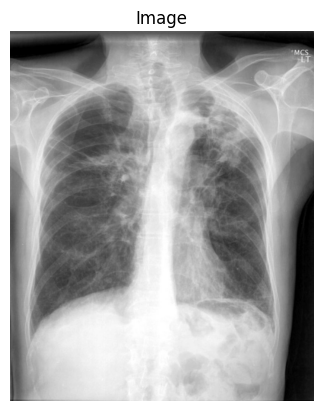

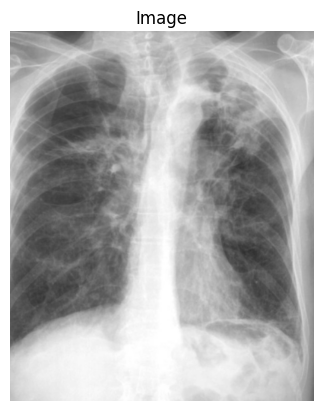

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import random

def show_image(image, title="Image"):
    """
    Display an image in a Jupyter Notebook using Matplotlib.
    :param image: Image as a numpy array.
    :param title: Title of the displayed image.
    """
    plt.imshow(image, cmap="gray" if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis("off")  # Hide axes
    plt.show()

def translate_image(image, tx, ty):
    """
    Translate the image by tx (x-axis) and ty (y-axis).
    :param image: Input image (numpy array).
    :param tx: Translation along the x-axis.
    :param ty: Translation along the y-axis.
    :return: Translated image.
    """
    height, width = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (width, height))
    return translated_image

def rotate_image(image, angle, center=None, scale=1.0):
    """
    Rotate the image by a specified angle.
    :param image: Input image (numpy array).
    :param angle: Angle to rotate (in degrees).
    :param center: Center of rotation. Defaults to the center of the image.
    :param scale: Scaling factor during rotation.
    :return: Rotated image.
    """
    height, width = image.shape[:2]
    if center is None:
        center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

import cv2
import numpy as np

def scale_image(image, scale_x, scale_y):
    """
    Scale the image while keeping the output size the same as the original.
    :param image: Input image (numpy array).
    :param scale_x: Scaling factor along the x-axis.
    :param scale_y: Scaling factor along the y-axis.
    :return: Scaled image with the same size as the original.
    """
    height, width = image.shape[:2]

    # Scale the image
    scaled_image = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)

    # Get new dimensions after scaling
    scaled_height, scaled_width = scaled_image.shape[:2]

    # Crop or pad to original size
    if scaled_height > height or scaled_width > width:
        # Crop the scaled image
        start_y = (scaled_height - height) // 2
        start_x = (scaled_width - width) // 2
        result = scaled_image[start_y:start_y + height, start_x:start_x + width]
    else:
        # Pad the scaled image
        pad_y = (height - scaled_height) // 2
        pad_x = (width - scaled_width) // 2
        result = cv2.copyMakeBorder(
            scaled_image,
            top=pad_y, bottom=pad_y + (height - scaled_height - pad_y),
            left=pad_x, right=pad_x + (width - scaled_width - pad_x),
            borderType=cv2.BORDER_CONSTANT,
            value=[0, 0, 0]  # Black padding
        )

    return result

def augment_image(img):
  aug_img=translate_image(img, tx=random.randint(30, 70), ty=random.randint(30,70))
  aug_img=rotate_image(img, angle=random.randint(5, 15))
  scale=random.uniform(0.85, 1.15)
  aug_img=scale_image(img, scale_x=scale, scale_y=scale)
  # aug_img=scale_image(img, scale_x=0.85, scale_y=0.85)
  return aug_img

image_path='/content/4f.png'

img=skimage.io.imread(image_path)
show_image(img)

output_folder_path = '/content/drive/My Drive/NLMCXR/synthetic_images'
number=1

# aug_img=translate_image(img, tx=random.randint(30, 70), ty=random.randint(30,70))
aug_img=scale_image(img, scale_x=1.25, scale_y=1.25)

show_image(aug_img)

# index=1
# for file_name in sorted(files):
#   image_path=os.path.join(folder_path,file_name)
#   print(image_path)
#   img=skimage.io.imread(image_path)
#   # show_image(img)
#   aug_img=augment_image(img)
#   output_file_path = os.path.join(output_folder_path, f'{index}.png')
#   print(output_file_path)
#   # print(index)
#   cv2.imwrite(output_file_path, aug_img)
#   index+=1
#   if index>100:
#     break
  # show_image(aug_img)
# translated_img = translate_image(img, tx=random.randint(30, 70), ty=random.randint(30,70))  # Shift right by 50px, up by 30px
# rotated_img = rotate_image(img, angle=random.randint(5, 15))
# scaled_img = scale_image(img, scale_x=random.uniform(0.85, 1.15), scale_y=random.uniform(0.8, 1.2))
# show_image(translated_img)
# aug_img = augment_image(img)
# show_image(aug_img)
